In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [59]:

sm_driking = pd.read_csv('smoking_driking_dataset_Ver01.csv')

king = sm_driking.dropna(axis=0)
king.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749537 entries, 0 to 749536
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               749537 non-null  object 
 1   age               749537 non-null  int64  
 2   height            749537 non-null  int64  
 3   weight            749537 non-null  int64  
 4   waistline         749537 non-null  float64
 5   sight_left        749537 non-null  float64
 6   sight_right       749537 non-null  float64
 7   hear_left         749537 non-null  float64
 8   hear_right        749537 non-null  float64
 9   SBP               749537 non-null  float64
 10  DBP               749537 non-null  float64
 11  BLDS              749537 non-null  float64
 12  tot_chole         749537 non-null  float64
 13  HDL_chole         749537 non-null  float64
 14  LDL_chole         749537 non-null  float64
 15  triglyceride      749537 non-null  float64
 16  hemoglobin        749537 

In [60]:

for column in king.columns:
    unique_values = king[column].unique()
    print(f"'{column}'의 종류 : {unique_values}")

'sex'의 종류 : ['Male' 'Female']
'age'의 종류 : [35 30 40 50 45 55 65 25 60 20 70 75 80 85]
'height'의 종류 : [170 180 165 175 150 155 160 145 140 185 135 190 130]
'weight'의 종류 : [ 75  80  60  55  65  50  85  70  45  40  95 120  90  35 105 100 110 115
 130  30 125 140  25 135]
'waistline'의 종류 : [ 90.   89.   91.   80.   75.   69.   84.2  84.   82.   79.2  98.   72.3
  88.   76.   73.   78.   99.   85.   67.   62.   92.   79.   87.   70.
  67.5  87.3  71.   92.9  94.   79.3  77.   75.7  85.5  74.   60.   81.
  72.   65.   63.   81.6  83.   61.  110.   86.8  73.5  93.  109.   54.
  91.2  66.   79.5  86.   97.1  76.2  80.5  68.   64.   74.1  85.9  65.3
  95.   94.5 100.   85.4  77.6  73.3 103.   93.5  67.8  69.2 105.7 105.
  74.2  97.   75.4  83.2  88.5  85.3  87.4  71.5  64.1  76.6  93.1  84.8
  88.1  66.8  96.   81.5  80.1  87.2  86.5 104.  114.   56.   88.8  89.2
  66.2  90.8  88.2  82.5  65.4  72.2  81.3  75.6  87.8  77.2  98.5  85.2
  97.5  63.5  95.4  72.6 110.8  81.2  87.5  89.5  82.4  81.8

In [61]:
replace_dict = {
    'Male':1, 'Female':0,
    'Y':1, 'N':0
}

king_replaced = king.replace(replace_dict)
king_replaced.info()


<class 'pandas.core.frame.DataFrame'>
Index: 749537 entries, 0 to 749536
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               749537 non-null  int64  
 1   age               749537 non-null  int64  
 2   height            749537 non-null  int64  
 3   weight            749537 non-null  int64  
 4   waistline         749537 non-null  float64
 5   sight_left        749537 non-null  float64
 6   sight_right       749537 non-null  float64
 7   hear_left         749537 non-null  float64
 8   hear_right        749537 non-null  float64
 9   SBP               749537 non-null  float64
 10  DBP               749537 non-null  float64
 11  BLDS              749537 non-null  float64
 12  tot_chole         749537 non-null  float64
 13  HDL_chole         749537 non-null  float64
 14  LDL_chole         749537 non-null  float64
 15  triglyceride      749537 non-null  float64
 16  hemoglobin        749537 

In [62]:
data = king_replaced.drop(columns=["DRK_YN"]).to_numpy()
aa=  king_replaced.drop(columns=["DRK_YN"])
target = king_replaced[["DRK_YN"]].to_numpy()

print("Data shape:", data.shape)
print("Target shape:", target.shape)

Data shape: (749537, 23)
Target shape: (749537, 1)


In [63]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, random_state=42)
print(train_input.shape, test_input.shape)

(562152, 23) (187385, 23)


In [64]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

train_scaled = ss.fit_transform(train_input)
test_scaled = ss.fit_transform(test_input)

In [65]:
from sklearn.tree import DecisionTreeClassifier
# 결정트리 생성 및 학습
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [66]:
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.7163116025558923
0.715708301091336


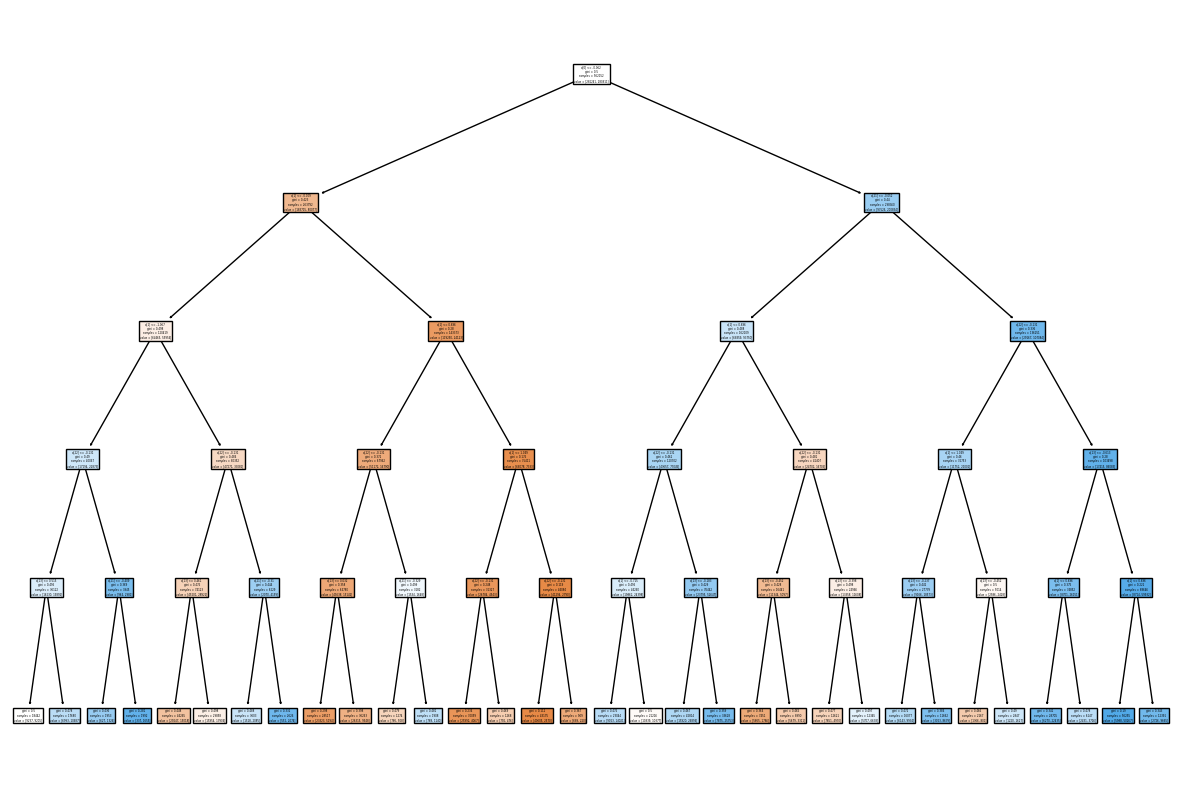

In [67]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dt,filled=True)
plt.show()

In [68]:
importance_scores = dt.feature_importances_
column_names = aa.columns.tolist()

for feature, importance in zip(column_names, importance_scores):
    print(f"{feature}: {importance}")

sex: 0.5273361106052089
age: 0.2660030011526686
height: 0.0
weight: 0.0
waistline: 0.0
sight_left: 0.0
sight_right: 0.0
hear_left: 0.0
hear_right: 0.0
SBP: 0.0
DBP: 0.0
BLDS: 0.0
tot_chole: 0.0
HDL_chole: 0.04342238949925425
LDL_chole: 0.0
triglyceride: 0.0
hemoglobin: 0.0
urine_protein: 0.0
serum_creatinine: 0.0
SGOT_AST: 0.0
SGOT_ALT: 0.0
gamma_GTP: 0.09132766253536011
SMK_stat_type_cd: 0.07191083620750809
